In [ ]:
# 

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
from matplotlib.dates import DateFormatter

# data cleaning

In [78]:
# import data - already aggregated hourly
names=['index','time','political','state','num_tot_tweets','num_tot_retweets',
       'bias_sanctity', 'bias_fairness', 'bias_authority','bias_loyalty', 'bias_care',
       'intensity_sanctity', 'intensity_fairness','intensity_authority', 'intensity_loyalty', 'intensity_care',
       'vice_sanctity', 'virtue_sanctity', 'vice_fairness', 'virtue_fairness',
       'vice_authority', 'virtue_authority', 'vice_loyalty', 'virtue_loyalty','vice_care', 'virtue_care',
       'anger','anticipation','disgust','fear','joy','love','optimism','pessimism','sadness','surprise','trust']

df = pd.read_csv('agg_covid_tweets_states.csv',names=names,lineterminator='\n')
df = df.drop_duplicates()
df = df.drop(0,axis=0)

/Users/fionaguo/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [79]:
# during aggregation, some dates index is included, some dates it's not, normalize the data
tmp = df[df['trust'].isnull()]
tmp.drop('trust',axis=1,inplace=True)

names.remove('index')
tmp.columns = names

df = df[~df['trust'].isnull()]
df.drop('index',axis=1,inplace=True)

df = pd.concat([df,tmp],axis=0)

df = df[~df.anticipation.isnull()]

df.time = pd.to_datetime(df.time)

# set time frame to 01/24 to 05/01
df = df[(df.time >= pd.Timestamp('2020-01-24')) & (df.time < pd.Timestamp('2020-05-01'))]

df = df.set_index(['time','political','state'])
df = df.astype(float)

df = df.sort_index(level=0)

df = df.reset_index()

df

,time,political,state,num_tot_tweets,num_tot_retweets,bias_sanctity,bias_fairness,bias_authority,bias_loyalty,bias_care,...,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2020-01-24 00:00:00,-1.0,AK,8.0,6.0,-0.115558,-0.085331,-0.093436,-0.090459,-0.107172,...,0.000000,0.125000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2020-01-24 00:00:00,-1.0,AL,17.0,13.0,-0.079721,0.001060,-0.028805,-0.039228,-0.007037,...,0.000000,0.117647,0.176471,0.000000,0.000000,0.235294,0.000000,0.000000,0.000000,0.000000
2,2020-01-24 00:00:00,-1.0,AR,5.0,3.0,-0.030927,0.035619,-0.017028,-0.016343,0.042674,...,0.200000,0.200000,0.200000,0.200000,0.000000,0.200000,0.000000,0.200000,0.000000,0.000000
3,2020-01-24 00:00:00,-1.0,AZ,22.0,20.0,-0.061938,-0.052352,-0.045468,-0.042103,-0.067456,...,0.045455,0.318182,0.363636,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000
4,2020-01-24 00:00:00,-1.0,CA,235.0,178.0,-0.071316,-0.046673,-0.052038,-0.050194,-0.056694,...,0.072340,0.302128,0.212766,0.038298,0.004255,0.029787,0.008511,0.097872,0.008511,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242927,2020-04-30 23:00:00,moderacy1,all,1929.0,1091.0,-0.000872,0.020250,0.002298,0.010440,0.029954,...,0.058580,0.348367,0.053914,0.161742,0.008294,0.111457,0.004666,0.089684,0.011923,0.002592
242928,2020-04-30 23:00:00,political-1,all,1833.0,1034.0,-0.000136,0.021395,0.002642,0.011030,0.031117,...,0.054010,0.352973,0.053464,0.162029,0.009274,0.110202,0.004364,0.090016,0.009820,0.002728
242929,2020-04-30 23:00:00,political1,all,919.0,546.0,-0.007291,-0.000457,0.000511,0.004389,0.013149,...,0.046790,0.365615,0.058760,0.150163,0.011970,0.100109,0.007617,0.076170,0.023939,0.002176
242930,2020-04-30 23:00:00,science-1,all,888.0,540.0,-0.007374,-0.000198,0.000472,0.004071,0.013349,...,0.045045,0.365991,0.059685,0.141892,0.010135,0.097973,0.007883,0.074324,0.025901,0.002252


# plot emotion and MF time series

In [80]:
# first look at all subpopulations, no partiton on political ideologies or US states
df_all = df[(df.political=='all')&(df.state=='all')]

In [86]:
df_all.to_csv('covid_tweets_emotions_mf_daily_agg.csv')

In [147]:
# calculate daily aggregation - less noise on the figure
var_names = ['bias_sanctity', 'bias_fairness', 'bias_authority','bias_loyalty', 'bias_care',
       'intensity_sanctity', 'intensity_fairness','intensity_authority', 'intensity_loyalty', 'intensity_care',
       'vice_sanctity', 'virtue_sanctity', 'vice_fairness', 'virtue_fairness',
       'vice_authority', 'virtue_authority', 'vice_loyalty', 'virtue_loyalty','vice_care', 'virtue_care',
       'anger','anticipation','disgust','fear','joy','love','optimism','pessimism','sadness','surprise','trust']

df_all_daily = df_all.copy(deep=True)

for var in var_names:
    df_all_daily[var] = df_all_daily[var]*df_all_daily['num_tot_tweets']
    
df_all_daily['date'] = df_all_daily.time.dt.date

df_all_daily = df_all_daily.groupby('date')[['num_tot_tweets']+var_names].sum()

for var in var_names:
    df_all_daily[var] = df_all_daily[var]/df_all_daily['num_tot_tweets']

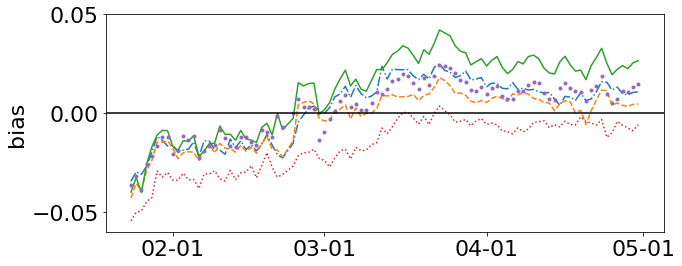

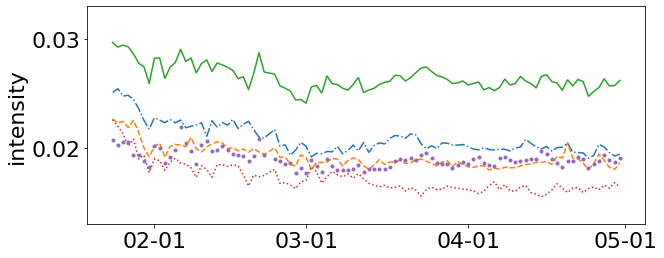

In [99]:
# plot moral foundation


for axis in ['bias']:
    fig,ax = plt.subplots(figsize=[10,4])
    for var,lt in zip(['loyalty','authority','care','sanctity','fairness'],['-.','--','-',':','.']):
        p = plt.plot(df_all_daily.loc[df_all_daily.index>=pd.Timestamp('2020-01-24'),axis+'_'+var],lt,label=var)
#     for e in events:
#         p1 = plt.axvline(x=pd.Timestamp(e[0]),color="black",label=e[1])
    plt.axhline(y=0,color='black')
    #plt.axvline(x=pd.Timestamp('2020-02-28'),color='black')
    #plt.legend(bbox_to_anchor=(0.5,-1),ncol=5)
    plt.ylim((-0.06,0.05))
    plt.xticks(rotation = 0)
    plt.ylabel(axis)
    # ax.xaxis.set_major_locator(plt.MaxNLocator(6))
    ax.xaxis.set_ticks([pd.Timestamp('2020-02-01'),pd.Timestamp('2020-03-01'),pd.Timestamp('2020-04-01'),pd.Timestamp('2020-05-01')])
    date_form = DateFormatter("%m-%d")
    ax.xaxis.set_major_formatter(date_form)
    plt.show()
    
    
for axis in ['intensity']:
    fig,ax = plt.subplots(figsize=[10,4])
    for var,lt in zip(['loyalty','authority','care','sanctity','fairness'],['-.','--','-',':','.']):
        p = plt.plot(df_all_daily.loc[df_all_daily.index>=pd.Timestamp('2020-01-24'),axis+'_'+var],lt,label=var)
#     for e in events:
#         p1 = plt.axvline(x=pd.Timestamp(e[0]),color="black",label=e[1])
    # plt.axhline(y=0,color='black')
    #plt.axvline(x=pd.Timestamp('2020-01-30'),color='black')
    # plt.legend(loc="lower center",mode='expand')
    plt.ylim((0.013,0.033))
    plt.xticks(rotation = 0)
    plt.ylabel(axis)
    date_form = DateFormatter("%m-%d")
    ax.xaxis.set_major_formatter(date_form)
    ax.xaxis.set_ticks([pd.Timestamp('2020-02-01'),pd.Timestamp('2020-03-01'),pd.Timestamp('2020-04-01'),pd.Timestamp('2020-05-01')])
    # plt.title('Bi')
    plt.show()

love
pessimism
surprise
trust


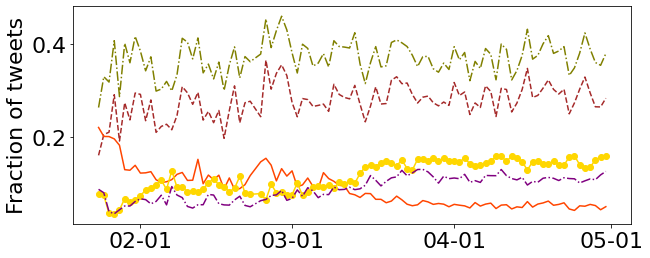

In [107]:
# plot emotions
emot_colnames = ['anger','disgust','fear','joy','love','optimism','pessimism','surprise','trust'] # flat not intereseting - sadness, anticipation
colors = ['brown','olive','orangered','gold','magenta','purple','teal','black','grey','pink']
linetype = ['--','-.','-','-o',':','-.','-x','-^','-<','->']

fig,ax = plt.subplots(figsize=[10,4])
for axis,color,lt in zip(emot_colnames,colors,linetype):
    if df_all_daily[axis].max() < 0.05: # don't show - otherwise too noisy
        print(axis)
        continue
    p = plt.plot(df_all_daily[axis],lt,label=axis,color=color)
#     for e in events:
#         p1 = plt.axvline(x=pd.Timestamp(e[0]),color="black",label=e[1])

#plt.legend(bbox_to_anchor=(0.5,-0.1),ncol=5)
plt.xticks(rotation = 0)
# plt.xlim((pd.Timestamp('2020-03-01'),pd.Timestamp('2020-03-31')))
# plt.ylim((0,0.5))
# plt.yscale('log')
plt.ylabel('Fraction of tweets')
# plt.title(group[0]+' population')
from matplotlib.dates import DateFormatter
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_ticks([pd.Timestamp('2020-02-01'),pd.Timestamp('2020-03-01'),pd.Timestamp('2020-04-01'),pd.Timestamp('2020-05-01')])
plt.show()

# Correlations

In [122]:
# emotions extracted using EmoLex method
df_emolex = pd.read_csv('covid_tweets_random_sampled_5perc_emolex_numerical_score.csv')
df_emolex['date'] = pd.to_datetime(df_emolex['date'])
df_emolex = df_emolex.set_index('date')

In [123]:
df_emolex

,anger_emolex,anticipation_emolex,disgust_emolex,fear_emolex,joy_emolex,love_emolex,sadness_emolex,surprise_emolex,trust_emolex
date,,,,,,,,,
2020-01-24,0.009696,0.010521,0.011033,0.017381,0.007943,0.0,0.014300,0.007465,0.018375
2020-01-25,0.009658,0.013297,0.010557,0.017050,0.009354,0.0,0.014308,0.008885,0.018698
2020-01-26,0.009246,0.016500,0.010014,0.017986,0.010485,0.0,0.015082,0.009578,0.020041
2020-01-27,0.010783,0.011422,0.011080,0.018180,0.005496,0.0,0.012700,0.008254,0.016994
2020-01-28,0.011789,0.012486,0.011403,0.017433,0.007159,0.0,0.013962,0.008872,0.018514
...,...,...,...,...,...,...,...,...,...
2020-04-26,0.013048,0.011713,0.011520,0.017918,0.007728,0.0,0.016058,0.007128,0.017828
2020-04-27,0.013503,0.012229,0.011147,0.018279,0.007587,0.0,0.015496,0.006689,0.017933
2020-04-28,0.012924,0.012537,0.011088,0.018218,0.007407,0.0,0.015421,0.006647,0.018016


In [163]:
# vader sentiments
vader = pd.read_csv('covid_tweets_random_sampled_5perc_vader.csv')
vader.date = pd.to_datetime(vader.date).dt.date
vader = vader[(vader.date >=pd.Timestamp('2020-01/24')) & (vader.date < pd.Timestamp('2020-05-01'))]
vader.set_index('date',inplace=True)
vader.columns = ['vader_sent']

/Users/fionaguo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [165]:
# combine all results
df_all_vars = pd.concat([df_all_daily,df_emolex,vader],axis=1)

/Users/fionaguo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/missing.py:483: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  return lib.array_equivalent_object(


In [167]:
corr = df_all_vars.corr(method='spearman')

In [168]:
corr #.to_csv('corr_matrix_between_all_vars.csv')

# EmoLex didn't label any tweet with love

,num_tot_tweets,bias_sanctity,bias_fairness,bias_authority,bias_loyalty,bias_care,intensity_sanctity,intensity_fairness,intensity_authority,intensity_loyalty,...,anger_emolex,anticipation_emolex,disgust_emolex,fear_emolex,joy_emolex,love_emolex,sadness_emolex,surprise_emolex,trust_emolex,vader_sent
num_tot_tweets,1.000000,-0.006049,-0.005838,0.142857,0.179637,0.055360,0.046221,-0.428992,-0.095532,-0.168525,...,-0.274379,-0.349897,-0.192812,-0.481656,-0.143620,NaN,-0.349306,0.125842,0.078345,-0.129957
bias_sanctity,-0.006049,1.000000,0.925981,0.842073,0.872765,0.927782,-0.858747,-0.404705,-0.611298,-0.485312,...,0.590114,-0.061843,0.077859,-0.018212,0.559410,NaN,0.512860,-0.668394,0.286372,0.705147
bias_fairness,-0.005838,0.925981,1.000000,0.900813,0.882219,0.988060,-0.811001,-0.360983,-0.696074,-0.565156,...,0.550652,0.007693,-0.020316,-0.072020,0.540777,NaN,0.499632,-0.671076,0.297457,0.761835
bias_authority,0.142857,0.842073,0.900813,1.000000,0.923969,0.934134,-0.779521,-0.431964,-0.772854,-0.574256,...,0.476331,-0.060699,-0.057082,-0.125618,0.461353,NaN,0.413423,-0.529495,0.350476,0.686777
bias_loyalty,0.179637,0.872765,0.882219,0.923969,1.000000,0.911793,-0.707264,-0.524182,-0.713299,-0.518633,...,0.407782,-0.203398,-0.072467,-0.228606,0.418972,NaN,0.343349,-0.636309,0.194851,0.697914
bias_care,0.055360,0.927782,0.988060,0.934134,0.911793,1.000000,-0.830160,-0.376762,-0.714851,-0.566234,...,0.554558,-0.018462,-0.017029,-0.097623,0.543407,NaN,0.495805,-0.647920,0.321231,0.753813
intensity_sanctity,0.046221,-0.858747,-0.811001,-0.779521,-0.707264,-0.830160,1.000000,0.310541,0.657387,0.550665,...,-0.655218,-0.136033,-0.157677,-0.115874,-0.559015,NaN,-0.571284,0.524708,-0.459289,-0.584710
intensity_fairness,-0.428992,-0.404705,-0.360983,-0.431964,-0.524182,-0.376762,0.310541,1.000000,0.534478,0.514202,...,-0.118714,0.451925,-0.012900,0.311290,0.101581,NaN,0.073598,0.146565,-0.045182,-0.212879
intensity_authority,-0.095532,-0.611298,-0.696074,-0.772854,-0.713299,-0.714851,0.657387,0.534478,1.000000,0.784294,...,-0.434173,-0.032953,0.004300,0.022012,-0.342573,NaN,-0.400997,0.369070,-0.398630,-0.556149
intensity_loyalty,-0.168525,-0.485312,-0.565156,-0.574256,-0.518633,-0.566234,0.550665,0.514202,0.784294,1.000000,...,-0.439275,0.076268,-0.091916,-0.048548,-0.254642,NaN,-0.379563,0.263071,-0.490440,-0.375171


In [133]:
emolex_cols = ['anger_emolex', 'anticipation_emolex', 'disgust_emolex', 'fear_emolex',
       'joy_emolex', 'love_emolex', 'sadness_emolex', 'surprise_emolex','trust_emolex']
spanemo_cols = ['anger', 'anticipation', 'disgust', 'fear',
       'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']
mf_bias = ['bias_sanctity', 'bias_fairness', 'bias_authority', 'bias_loyalty', 'bias_care']
mf_intensity = ['intensity_sanctity', 'intensity_fairness', 'intensity_authority', 'intensity_loyalty', 'intensity_care']

In [139]:
print('Corrlation b/t MF bias and Emolex')
corr.loc[emolex_cols,mf_bias]

Corrlation b/t MF bias and Emolex


,bias_sanctity,bias_fairness,bias_authority,bias_loyalty,bias_care
anger_emolex,0.590114,0.550652,0.476331,0.407782,0.554558
anticipation_emolex,-0.061843,0.007693,-0.060699,-0.203398,-0.018462
disgust_emolex,0.077859,-0.020316,-0.057082,-0.072467,-0.017029
fear_emolex,-0.018212,-0.072020,-0.125618,-0.228606,-0.097623
joy_emolex,0.559410,0.540777,0.461353,0.418972,0.543407
love_emolex,NaN,NaN,NaN,NaN,NaN
sadness_emolex,0.512860,0.499632,0.413423,0.343349,0.495805
surprise_emolex,-0.668394,-0.671076,-0.529495,-0.636309,-0.647920
trust_emolex,0.286372,0.297457,0.350476,0.194851,0.321231


In [140]:
print('Corrlation b/t MF bias and SpanEmo')
corr.loc[spanemo_cols,mf_bias]

Corrlation b/t MF bias and SpanEmo


,bias_sanctity,bias_fairness,bias_authority,bias_loyalty,bias_care
anger,0.429216,0.372502,0.393659,0.306543,0.389833
anticipation,0.565472,0.563723,0.511361,0.513794,0.566313
disgust,0.211182,0.174942,0.192563,0.127262,0.188710
fear,-0.757140,-0.736075,-0.688434,-0.663423,-0.743609
joy,0.782519,0.764004,0.699598,0.693733,0.758731
love,0.738770,0.708237,0.656388,0.672667,0.711879
optimism,0.850778,0.839102,0.787424,0.776339,0.841192
pessimism,0.702543,0.597268,0.543473,0.559528,0.602133
sadness,0.299127,0.275260,0.281796,0.370214,0.278456
surprise,-0.240979,-0.297352,-0.194732,-0.154613,-0.252696
